Tentative de stats descriptives sympa !

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [15]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

Unnamed: 0         Nom            Etat Code_Etat  id_Etat  id_county  \
1304        1304     Oakland        Michigan        MI    27304      28646   
2363        2363   McCormick  South Carolina        SC    27323      29723   
1337        1337     Chisago       Minnesota        MN    27305      28680   
203          203    Imperial      California        CA    27286      27534   
866          866  Montgomery            Iowa        IA    27297      28203   

            NAME                                           geometry     fips  \
1304     Oakland  POLYGON ((-83.68938399999999 42.871263, -83.67...  26125.0   
2363   McCormick  POLYGON ((-82.5944878368938 34.0139372478806, ...  45065.0   
1337     Chisago  POLYGON ((-93.14197 45.5653, -93.141734 45.578...  27025.0   
203     Imperial  POLYGON ((-116.106166 32.640201999999995, -116...   6025.0   
866   Montgomery  POLYGON ((-95.384743 40.908746, -95.384737 40....  19137.0   

      unemp_rate_year_2013  ...  bachelors_deg_year_2018  score_legis  \
1304                   6.6  ...                     46.4         3.25   
2363                   7.7  ...                     20.2         1.25   
1337                   5.5  ...                     20.5         3.70   
203                   22.1  ...                     14.5         5.10   
866                    4.5  ...                     17.5         3.10   

      bchecks_2013  bchecks_2014  bchecks_2015  bchecks_2016  bchecks_2017  \
1304        503979        424091        500921        579605        513243   
2363        335695        289764        326997        402978        396920   
1337        525774        481122        519244        651599        683544   
203        1368295       1474616       1761079       2377167       1570110   
866         160062        127022        147309        202277        160981   

      bchecks_2018   per_dem   per_gop  
1304        489957  0.517110  0.435921  
2363        280749  0.475360  0.508341  
1337        604078  0.309207  0.614516  
203        1297132  0.681828  0.270532  
866         189159  0.262505  0.686475  

[5 rows x 48 columns]

In [4]:
gun_violence_db = pd.read_csv('data/gun_violence_db.csv')
gun_violence_db.sample(5)

incident_id        date         state city_or_county  \
221070       998531  2017-11-29      Maryland      Baltimore   
58901        298504  2015-02-26      Illinois      Champaign   
112522       506355  2016-02-17  Pennsylvania      Allentown   
140527       629151  2016-08-12       Alabama  Muscle Shoals   
39783        200006  2014-10-02    California      Hollywood   

                           address  n_killed  n_injured  \
221070     1900 block of Belair Rd         0          1   
58901         200 block of Arcadia         0          0   
112522              616 Godfrey St         0          2   
140527  1100 block of Grand Avenue         1          0   
39783              Melrose Avenue          1          0   

                                             incident_url  \
221070  http://www.gunviolencearchive.org/incident/998531   
58901   http://www.gunviolencearchive.org/incident/298504   
112522  http://www.gunviolencearchive.org/incident/506355   
140527  http://www.gunviolencearchive.org/incident/629151   
39783   http://www.gunviolencearchive.org/incident/200006   

                                               source_url  \
221070  https://www.facebook.com/BaltimoreCityPolice/p...   
58901   http://www.illinoishomepage.net/story/d/story/...   
112522  http://www.poconorecord.com/news/20160308/man-...   
140527  http://hosted2.ap.org/TNCLE/3cb600d50a53461980...   
39783   http://www.nbclosangeles.com/news/local/Person...   

        incident_url_fields_missing  ...     participant_age  \
221070                        False  ...                 NaN   
58901                         False  ...                 NaN   
112522                        False  ...           {1: '62'}   
140527                        False  ...  {0: '40', 1: '36'}   
39783                         False  ...                 NaN   

                                   participant_age_group  \
221070                                               NaN   
58901                                                NaN   
112522                  {0: 'Adult 18+', 1: 'Adult 18+'}   
140527  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+'}   
39783                                   {0: 'Adult 18+'}   

                         participant_gender  \
221070                          {0: 'Male'}   
58901                                   NaN   
112522               {0: 'Male', 1: 'Male'}   
140527  {0: 'Male', 1: 'Female', 2: 'Male'}   
39783                                   NaN   

                                         participant_name  \
221070                                                NaN   
58901                                                 NaN   
112522               {0: 'Officer', 1: 'Walter Bratvold'}   
140527  {0: 'Jason Lee Fox', 1: 'Erica Fox', 2: 'Ronni...   
39783                                                 NaN   

                             participant_relationship  \
221070                                            NaN   
58901                                             NaN   
112522                                            NaN   
140527  {1: 'Significant others - current or former'}   
39783                                             NaN   

                                       participant_status  \
221070                                     {0: 'Injured'}   
58901                                                 NaN   
112522             {0: 'Injured', 1: 'Injured, Arrested'}   
140527  {0: 'Killed', 1: 'Unharmed, Arrested', 2: 'Unh...   
39783                                       {0: 'Killed'}   

                                         participant_type  \
221070                                      {0: 'Victim'}   
58901                                                 NaN   
112522                {0: 'Victim', 1: 'Subject-Suspect'}   
140527  {0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...   
39783                                       {0: 'Victim'}   

                                                  sources  \


Première visualisation des données géographiques à notre disposition :

In [45]:
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt.loads)

Pour l'instant, on ne plot pas l'Alaska ni Hawaii :

In [62]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']


In [63]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [67]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

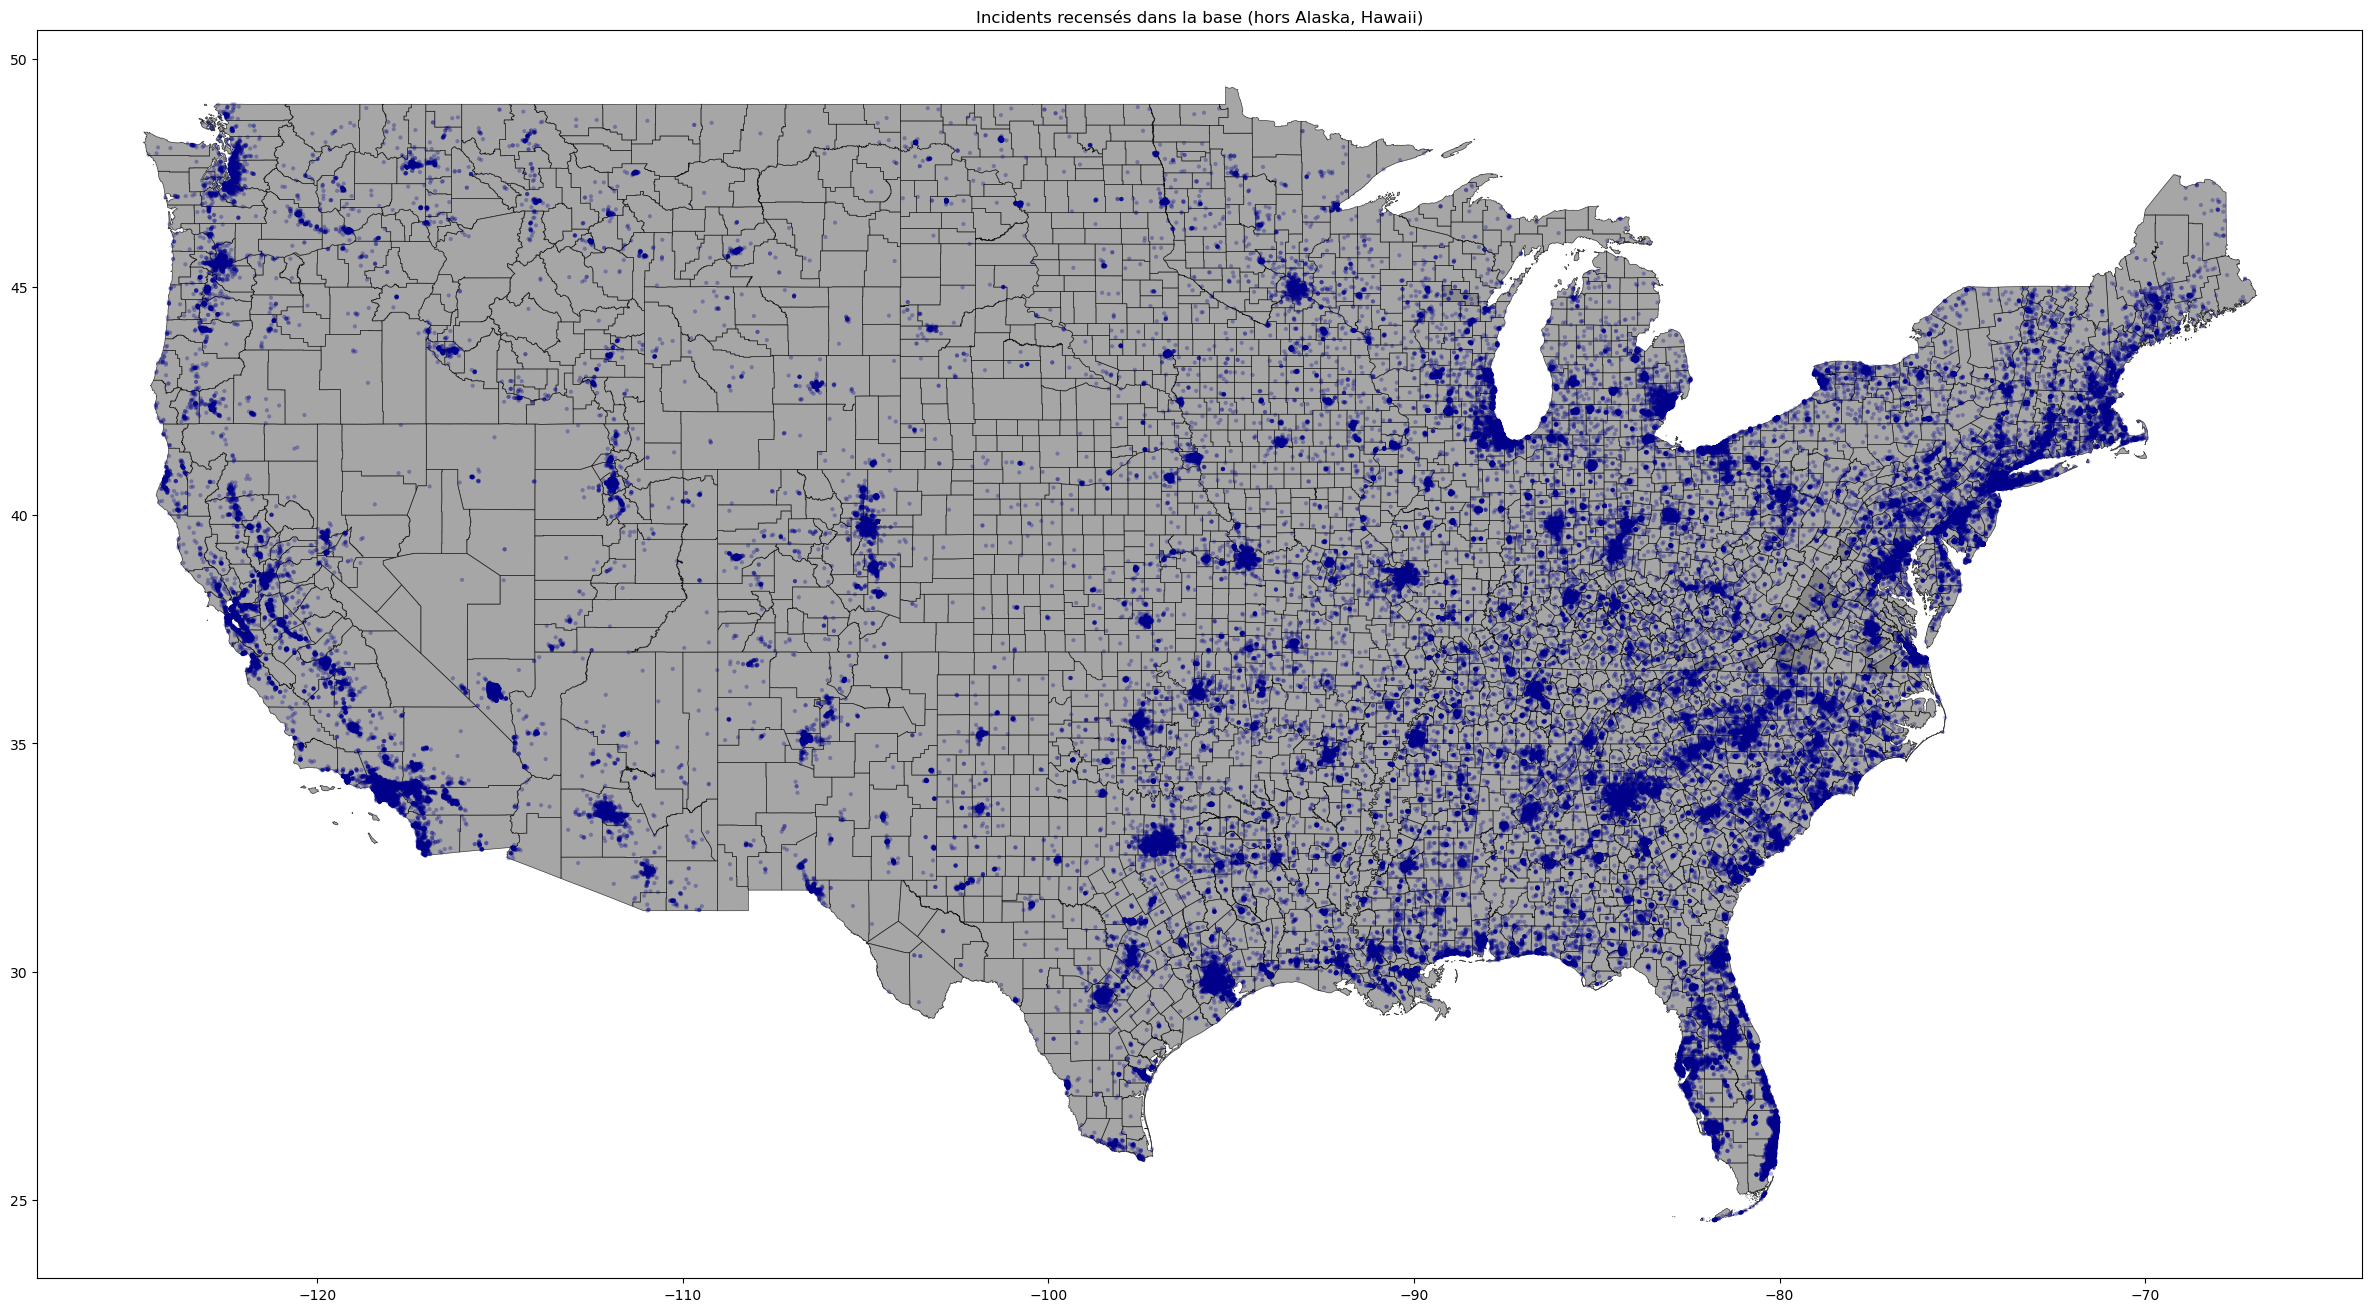

In [85]:
ax = total_db_geo.plot(color='gray', markersize=1, alpha=0.7, figsize=(30, 30), edgecolor='black', linewidth=0.5)

gun_violence_geo.plot(ax=ax, color='darkblue', alpha=0.3, marker = '.', edgecolor='none')
plt.title("Incidents recensés dans la base (hors Alaska, Hawaii)")
plt.show()

On peut également se focaliser sur une ville ou un Etat, ici New York, et visualiser la localisation exacte des incidents sur une carte interactive:

In [98]:
import folium
from folium.plugins import MarkerCluster

map_center = [40.7128, -74.0060]#Center coordinates for NYC

my_map = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(my_map)

for index, row in gun_violence_geo.loc[gun_violence_geo['state'] == 'New York'].iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

my_map